In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline
import statsmodels.api as sm
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf 
from pandas import DataFrame as df

In [33]:
df = pd.read_csv('tesla.csv' , index_col = 'Date' , parse_dates = True)
df.head()
df = df.dropna(how='all')
# df.dropna(inplace = True)

In [34]:
df = df[['Close']]
df = df.asfreq('d')

In [39]:
365*0.8

292.0

In [36]:
df = df.fillna(method = 'ffill')

In [42]:
train_df = df['Close'].iloc[:300]
test_df = df['Close'].iloc[300:]
train_df

Date
2020-03-02    148.723999
2020-03-03    149.102005
2020-03-04    149.899994
2020-03-05    144.908005
2020-03-06    140.695999
                 ...    
2020-12-22    640.340027
2020-12-23    645.979980
2020-12-24    661.770020
2020-12-25    661.770020
2020-12-26    661.770020
Freq: D, Name: Close, Length: 300, dtype: float64

/home/tbh/anaconda3/envs/data/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/home/tbh/anaconda3/envs/data/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning:

overflow encountered in matmul



<AxesSubplot:xlabel='Date'>

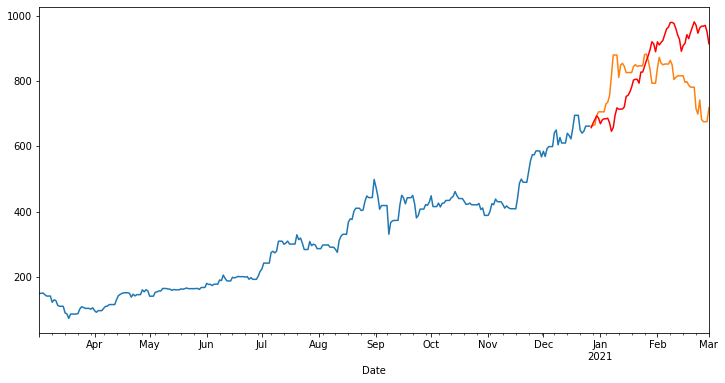

In [67]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit_model = ExponentialSmoothing(train_df,trend = 'mul' , seasonal = 'mul' , seasonal_periods = 
                                53).fit()
prediction = fit_model.forecast(65)
prediction

# Plot training, testing and projection data
train_df.plot(figsize=(12,6))
test_df.plot()
prediction.plot(color = 'red')

In [57]:
df.isnull().values.any()

False

In [69]:
from statsmodels.tsa.ar_model import AutoReg , ar_select_order

In [70]:
model_autoReg = AutoReg(df['Close'] , 30)
model_fit = model_autoReg.fit()

/home/tbh/anaconda3/envs/data/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



/home/tbh/anaconda3/envs/data/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



<AxesSubplot:xlabel='Date'>

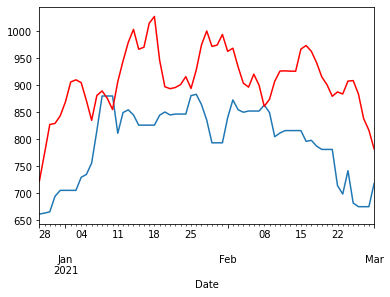

In [86]:
train_model_autoReg = AutoReg(train_df , 120).fit(cov_type = 'HC0')
start = len(train_df)
end = len(train_df)+len(test_df) -1

prediction = train_model_autoReg.predict(start = start , end = end)
test_df.plot() 
prediction.plot(color = 'red')


In [87]:
prediction

2020-12-27    722.338034
2020-12-28    774.148610
2020-12-29    827.368091
2020-12-30    829.340564
2020-12-31    843.478776
                 ...    
2021-02-25    908.494531
2021-02-26    883.701230
2021-02-27    838.143223
2021-02-28    816.800810
2021-03-01    782.121769
Freq: D, Length: 65, dtype: float64

<AxesSubplot:xlabel='Date'>

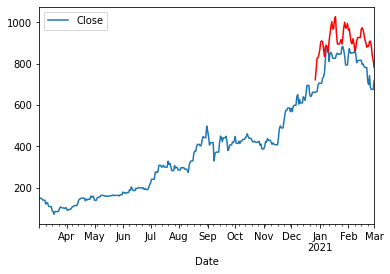

In [88]:
df.plot()
prediction.plot(color = 'red')